In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
from matplotlib.cm import ScalarMappable
import matplotlib as mpl
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split




spotify = pd.read_csv('/Users/rickvanmil/Downloads/spotify_top50_2021.csv')

In [184]:
spotify.head()

,id,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.137,143.875,242013,4
1,2,Lil Nas X,MONTERO (Call Me By Your Name),1SC5rEoYDGUK4NfG82494W,90,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,0.710,178.781,137704,4
2,3,The Kid LAROI,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,92,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.478,169.928,141806,4
3,4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147,4
4,5,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4


In [185]:
spotify.describe()

,id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,86.800000,0.685720,0.64636,5.180000,-5.903920,0.620000,0.081374,0.253811,0.001606,0.182292,0.528884,121.083860,197488.400000,3.960000
std,14.57738,6.266203,0.124987,0.14712,3.868713,2.036948,0.490314,0.057164,0.235345,0.006425,0.137799,0.232789,29.252206,34727.260592,0.197949
min,1.00000,67.000000,0.380000,0.33900,0.000000,-11.639000,0.000000,0.028400,0.001460,0.000000,0.047600,0.082300,72.017000,132780.000000,3.000000
25%,13.25000,85.250000,0.597750,0.54525,1.000000,-7.186250,0.000000,0.046125,0.040000,0.000000,0.093225,0.401500,98.655500,172400.500000,4.000000
50%,25.50000,88.000000,0.714500,0.65650,5.500000,-5.485500,1.000000,0.063150,0.196000,0.000000,0.115000,0.518000,120.516500,198712.500000,4.000000
75%,37.75000,90.000000,0.774500,0.76475,8.000000,-4.258500,1.000000,0.094300,0.405500,0.000024,0.246500,0.706250,138.532000,215597.000000,4.000000
max,50.00000,95.000000,0.903000,0.89300,11.000000,-2.810000,1.000000,0.286000,0.827000,0.038200,0.688000,0.958000,180.917000,287120.000000,4.000000


Let's see how the valence of a song is affected by the danceability: 

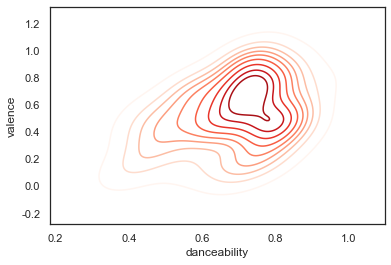

In [186]:
sns.set_style("white")
sns.kdeplot(x=spotify.danceability, y=spotify.valence, cmap = "Reds")
plt.show()

Density of popularity compared to the tempo of the song.

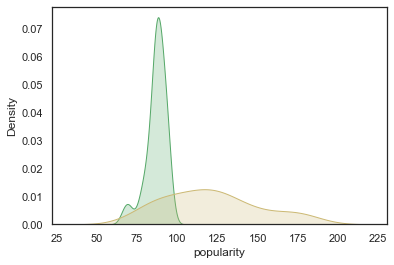

In [187]:
sns.set_style("white")
fig = sns.kdeplot(spotify['popularity'], shade=True, color="g")
fig = sns.kdeplot(spotify['tempo'], shade=True, color="y")
plt.show()

Select a couple of artists of interest:

In [188]:

artists = ["Dua Lipa", "The Weeknd", "Ariana Grande"]
rslt = spotify[spotify['artist_name'].isin(artists)]
rslt.head()


,id,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
4,5,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064,4
7,8,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,93,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4
14,15,The Weeknd,Save Your Tears,5QO79kh1waicV47BqGRL3g,90,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,215627,4
30,31,Ariana Grande,positions,35mvY5S1H3J2QZyna3TFe0,88,0.737,0.802,0,-4.771,1,0.0878,0.46800,0.000000,0.0931,0.682,144.015,172325,4
40,41,Dua Lipa,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,84,0.793,0.793,11,-4.521,0,0.0830,0.01230,0.000000,0.0951,0.679,123.950,183290,4


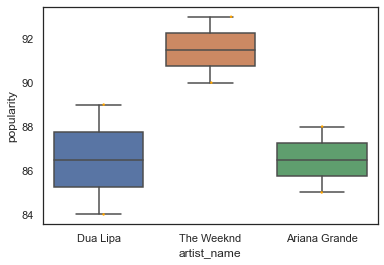

In [189]:

ax = sns.boxplot(x='artist_name', y='popularity', data=rslt)
ax = sns.stripplot(x='artist_name', y='popularity', data=rslt, color="orange", jitter=0.2, size=2.5)

In [190]:
rslt = pd.DataFrame(rslt, columns = ['artist_name',  'danceability', 'energy','valence' ])
rslt.head()

rslt = rslt.groupby(['artist_name'])['danceability', 'energy', 'valence'].mean()
rslt.head()

/var/folders/gc/jgmdzy7d5sg20q_p4z5krfxm0000gn/T/ipykernel_22981/1953581539.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rslt = rslt.groupby(['artist_name'])['danceability', 'energy', 'valence'].mean()


,danceability,energy,valence
artist_name,,,
Ariana Grande,0.7835,0.6935,0.5835
Dua Lipa,0.7475,0.8090,0.7970
The Weeknd,0.5970,0.7780,0.4890


<AxesSubplot:xlabel='danceability', ylabel='popularity'>

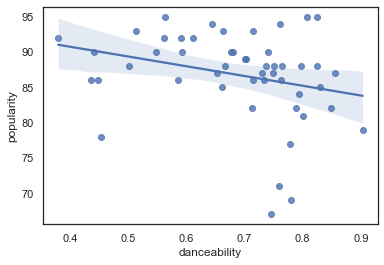

In [191]:
sns.regplot(x=spotify["danceability"], y=spotify["popularity"])


<AxesSubplot:xlabel='energy', ylabel='loudness'>

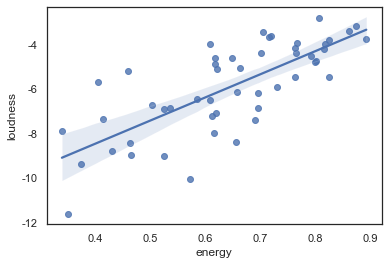

In [193]:
sns.regplot(x=spotify["energy"], y=spotify["loudness"])

<AxesSubplot:>

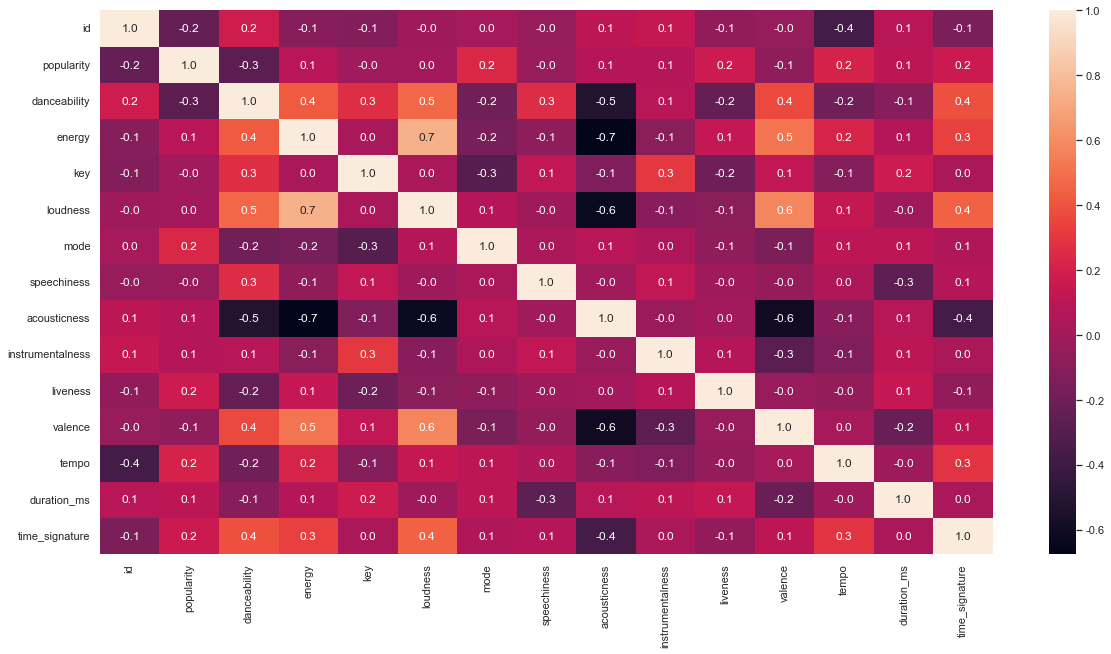

In [192]:
plt.figure(figsize=(20,10))
sns.heatmap(spotify.corr(), annot=True, fmt='.1f')

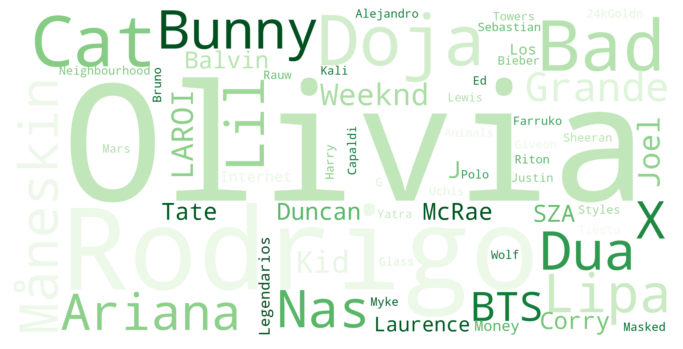

In [200]:
from wordcloud import WordCloud

plt.style.use('seaborn')
wrds1 = spotify["artist_name"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="Greens",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(12,18))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.show()